# **Aim of the notebook:**
To check if the bias exsists in the Training dataset of IndicTrans2. Bias here means if the translation of ambiguos words is done more for paternal than maternal. 
To check the ratio of sentences in paternal vs maternal in both training and dataset.

In [1]:
import pandas as pd

# Languages Involved:


In [ ]:
# languages = [ 'or', 'hi', 'ta', 'te','bn', 'gu',  'kn', 'ml', 'mr',  'pa'  ]

# Datasets involved:

In [3]:
# path = 'https://indictrans2-public.objectstore.e2enetworks.net/BPCC.zip'
# zip_path = path.split('/')[-1]

# # Download the dataset using above link
# !wget $path -O $zip_path


In [2]:
# !unzip $zip_path

## Langs and scripts

In [2]:
# create a list with data (just include within bracket): Assamese (asm_Beng)	Kashmiri (Arabic) (kas_Arab)	Punjabi (pan_Guru)
# Bengali (ben_Beng)	Kashmiri (Devanagari) (kas_Deva)	Sanskrit (san_Deva)
# Bodo (brx_Deva)	Maithili (mai_Deva)	Santali (sat_Olck)
# Dogri (doi_Deva)	Malayalam (mal_Mlym)	Sindhi (Arabic) (snd_Arab)
# English (eng_Latn)	Marathi (mar_Deva)	Sindhi (Devanagari) (snd_Deva)
# Konkani (gom_Deva)	Manipuri (Bengali) (mni_Beng)	Tamil (tam_Taml)
# Gujarati (guj_Gujr)	Manipuri (Meitei) (mni_Mtei)	Telugu (tel_Telu)
# Hindi (hin_Deva)	Nepali (npi_Deva)	Urdu (urd_Arab)
# Kannada (kan_Knda)	Odia (ory_Orya)	

lang_script_list = [
    # 'asm_Beng', 'kas_Arab',
                     'pan_Guru', 'ben_Beng', 
                    #  'kas_Deva', 'san_Deva', 'brx_Deva', 'mai_Deva', 'sat_Olck', 'doi_Deva',
                       'mal_Mlym',
                     #    #  'snd_Arab',
                     #    #    'eng_Latn', 
                           'mar_Deva', 
                     #    #    'snd_Deva', 'gom_Deva', 'mni_Beng', 
                           'tam_Taml', 'guj_Gujr', 
                     #    #    'mni_Mtei', 
                           'tel_Telu', 'hin_Deva', 
                     #    #    'npi_Deva', 'urd_Arab', 
                           'kan_Knda', 
                           'ory_Orya'
                           ]

len(lang_script_list)

10

In [3]:
# Traverse through each folder of XXXU and print the folder names
import os
import pandas as pd
import tqdm

# Create a list to store the folder names
# folders = []
 # create a list of 10 items of dataframes in an array
df_list = {
    i : pd.DataFrame() for i in (lang_script_list)
}

df_list

{'pan_Guru': Empty DataFrame
 Columns: []
 Index: [],
 'ben_Beng': Empty DataFrame
 Columns: []
 Index: [],
 'mal_Mlym': Empty DataFrame
 Columns: []
 Index: [],
 'mar_Deva': Empty DataFrame
 Columns: []
 Index: [],
 'tam_Taml': Empty DataFrame
 Columns: []
 Index: [],
 'guj_Gujr': Empty DataFrame
 Columns: []
 Index: [],
 'tel_Telu': Empty DataFrame
 Columns: []
 Index: [],
 'hin_Deva': Empty DataFrame
 Columns: []
 Index: [],
 'kan_Knda': Empty DataFrame
 Columns: []
 Index: [],
 'ory_Orya': Empty DataFrame
 Columns: []
 Index: []}

In [39]:

dataset_root='old_code/BPCC/'
# Traverse through each folder of XXXU and print the folder names
for folder in os.listdir(dataset_root):
    # folders.append(folder)
    # print(folder)
    # Traverse these folders and print the file names
    # for sub_folder in os.listdir('BPCC/'+folder):
    # tqdm progress bar
    for sub_folder in tqdm.tqdm(os.listdir(dataset_root+folder)):
        # print(file)
        eng, indic_lang = sub_folder.split('-') # source and target langs
        if indic_lang in lang_script_list:
            # print the file names within the sub folders
            for file in os.listdir(dataset_root+folder+'/'+sub_folder):
                print(dataset_root+folder+'/'+sub_folder+'/'+file)
                if 'train' in file:
                    df = pd.DataFrame(columns=['eng_Latn', indic_lang])
                    if 'eng_Latn' in file:
                        # df['eng_Latn'] = pd.read_csv('BPCC/'+folder+'/'+sub_folder+'/'+file, sep='\t', encoding='utf-8', )
                        # print('early now: BPCC/'+folder+'/'+sub_folder+'/'+file)
                        with open(dataset_root+folder+'/'+sub_folder+'/'+file) as f:
                            df_en = f.readlines()
                    else:
                        # df[indic_lang] = pd.read_csv('BPCC/'+folder+'/'+sub_folder+'/'+file, sep='\t', encoding='utf-8')
                        # print('now: BPCC/'+folder+'/'+sub_folder+'/'+file)
                        with open(dataset_root+folder+'/'+sub_folder+'/'+file) as f:
                            df_ind = f.readlines()
            df = pd.DataFrame()
            df['eng_Latn'] = df_en
            df[indic_lang] = df_ind
            
            df_list[indic_lang] = pd.concat([df_list[indic_lang], df], axis=0)

                    
df_list        



# BPCC/nllb_filtered/eng_Latn-ory_Orya/train.eng_Latn

  0%|          | 0/19 [00:00<?, ?it/s]

old_code/BPCC/nllb_filtered/eng_Latn-ory_Orya/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-ory_Orya/labse_scores.txt
old_code/BPCC/nllb_filtered/eng_Latn-ory_Orya/train.ory_Orya


 11%|█         | 2/19 [00:02<00:21,  1.24s/it]

old_code/BPCC/nllb_filtered/eng_Latn-pan_Guru/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-pan_Guru/labse_scores.txt
old_code/BPCC/nllb_filtered/eng_Latn-pan_Guru/train.pan_Guru


 16%|█▌        | 3/19 [00:05<00:29,  1.87s/it]

old_code/BPCC/nllb_filtered/eng_Latn-mar_Deva/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-mar_Deva/labse_scores.txt
old_code/BPCC/nllb_filtered/eng_Latn-mar_Deva/train.mar_Deva


 26%|██▋       | 5/19 [00:11<00:36,  2.61s/it]

old_code/BPCC/nllb_filtered/eng_Latn-guj_Gujr/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-guj_Gujr/labse_scores.txt
old_code/BPCC/nllb_filtered/eng_Latn-guj_Gujr/train.guj_Gujr


 37%|███▋      | 7/19 [00:21<00:44,  3.69s/it]

old_code/BPCC/nllb_filtered/eng_Latn-ben_Beng/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-ben_Beng/labse_scores.txt
old_code/BPCC/nllb_filtered/eng_Latn-ben_Beng/train.ben_Beng


 53%|█████▎    | 10/19 [00:35<00:36,  4.10s/it]

old_code/BPCC/nllb_filtered/eng_Latn-tel_Telu/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-tel_Telu/labse_scores.txt
old_code/BPCC/nllb_filtered/eng_Latn-tel_Telu/train.tel_Telu


 58%|█████▊    | 11/19 [00:48<00:46,  5.82s/it]

old_code/BPCC/nllb_filtered/eng_Latn-tam_Taml/train.tam_Taml
old_code/BPCC/nllb_filtered/eng_Latn-tam_Taml/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-tam_Taml/labse_scores.txt


 68%|██████▊   | 13/19 [00:58<00:33,  5.56s/it]

old_code/BPCC/nllb_filtered/eng_Latn-mal_Mlym/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-mal_Mlym/labse_scores.txt
old_code/BPCC/nllb_filtered/eng_Latn-mal_Mlym/train.mal_Mlym


 84%|████████▍ | 16/19 [01:09<00:14,  4.69s/it]

old_code/BPCC/nllb_filtered/eng_Latn-hin_Deva/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-hin_Deva/labse_scores.txt
old_code/BPCC/nllb_filtered/eng_Latn-hin_Deva/train.hin_Deva


 95%|█████████▍| 18/19 [01:17<00:04,  4.52s/it]

old_code/BPCC/nllb_filtered/eng_Latn-kan_Knda/train.eng_Latn
old_code/BPCC/nllb_filtered/eng_Latn-kan_Knda/labse_scores.txt
old_code/BPCC/nllb_filtered/eng_Latn-kan_Knda/train.kan_Knda


  0%|          | 0/17 [00:00<?, ?it/s]

old_code/BPCC/comparable/eng_Latn-ory_Orya/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-ory_Orya/labse_scores.txt
old_code/BPCC/comparable/eng_Latn-ory_Orya/train.ory_Orya


  6%|▌         | 1/17 [00:00<00:15,  1.06it/s]

old_code/BPCC/comparable/eng_Latn-pan_Guru/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-pan_Guru/labse_scores.txt
old_code/BPCC/comparable/eng_Latn-pan_Guru/train.pan_Guru


 12%|█▏        | 2/17 [00:01<00:11,  1.27it/s]

old_code/BPCC/comparable/eng_Latn-mar_Deva/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-mar_Deva/labse_scores.txt
old_code/BPCC/comparable/eng_Latn-mar_Deva/train.mar_Deva


 18%|█▊        | 3/17 [00:03<00:16,  1.19s/it]

old_code/BPCC/comparable/eng_Latn-guj_Gujr/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-guj_Gujr/labse_scores.txt
old_code/BPCC/comparable/eng_Latn-guj_Gujr/train.guj_Gujr


 29%|██▉       | 5/17 [00:05<00:14,  1.17s/it]

old_code/BPCC/comparable/eng_Latn-ben_Beng/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-ben_Beng/labse_scores.txt
old_code/BPCC/comparable/eng_Latn-ben_Beng/train.ben_Beng


 47%|████▋     | 8/17 [00:07<00:08,  1.08it/s]

old_code/BPCC/comparable/eng_Latn-tel_Telu/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-tel_Telu/labse_scores.txt
old_code/BPCC/comparable/eng_Latn-tel_Telu/train.tel_Telu


 53%|█████▎    | 9/17 [00:10<00:09,  1.20s/it]

old_code/BPCC/comparable/eng_Latn-tam_Taml/train.tam_Taml
old_code/BPCC/comparable/eng_Latn-tam_Taml/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-tam_Taml/labse_scores.txt


 65%|██████▍   | 11/17 [00:12<00:06,  1.15s/it]

old_code/BPCC/comparable/eng_Latn-mal_Mlym/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-mal_Mlym/labse_scores.txt
old_code/BPCC/comparable/eng_Latn-mal_Mlym/train.mal_Mlym


 82%|████████▏ | 14/17 [00:14<00:02,  1.09it/s]

old_code/BPCC/comparable/eng_Latn-hin_Deva/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-hin_Deva/labse_scores.txt
old_code/BPCC/comparable/eng_Latn-hin_Deva/train.hin_Deva


 88%|████████▊ | 15/17 [00:16<00:02,  1.25s/it]

old_code/BPCC/comparable/eng_Latn-kan_Knda/train.eng_Latn
old_code/BPCC/comparable/eng_Latn-kan_Knda/labse_scores.txt
old_code/BPCC/comparable/eng_Latn-kan_Knda/train.kan_Knda


  0%|          | 0/11 [00:00<?, ?it/s]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-ory_Orya/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-ory_Orya/labse_scores.txt
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-ory_Orya/train.ory_Orya


  9%|▉         | 1/11 [00:00<00:09,  1.03it/s]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-pan_Guru/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-pan_Guru/labse_scores.txt
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-pan_Guru/train.pan_Guru


 18%|█▊        | 2/11 [00:03<00:15,  1.77s/it]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-mar_Deva/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-mar_Deva/labse_scores.txt
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-mar_Deva/train.mar_Deva


 27%|██▋       | 3/11 [00:05<00:17,  2.16s/it]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-guj_Gujr/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-guj_Gujr/labse_scores.txt
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-guj_Gujr/train.guj_Gujr


 45%|████▌     | 5/11 [00:08<00:10,  1.73s/it]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-ben_Beng/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-ben_Beng/labse_scores.txt
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-ben_Beng/train.ben_Beng


 55%|█████▍    | 6/11 [00:14<00:14,  2.86s/it]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-tel_Telu/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-tel_Telu/labse_scores.txt
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-tel_Telu/train.tel_Telu


 64%|██████▎   | 7/11 [00:18<00:12,  3.09s/it]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-tam_Taml/train.tam_Taml
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-tam_Taml/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-tam_Taml/labse_scores.txt


 73%|███████▎  | 8/11 [00:21<00:09,  3.28s/it]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-mal_Mlym/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-mal_Mlym/labse_scores.txt
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-mal_Mlym/train.mal_Mlym


 82%|████████▏ | 9/11 [00:25<00:06,  3.49s/it]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-hin_Deva/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-hin_Deva/labse_scores.txt
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-hin_Deva/train.hin_Deva


 91%|█████████ | 10/11 [00:34<00:04,  4.95s/it]

old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-kan_Knda/train.eng_Latn
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-kan_Knda/labse_scores.txt
old_code/BPCC/samanantar_v0.3_filtered/eng_Latn-kan_Knda/train.kan_Knda


  0%|          | 0/13 [00:00<?, ?it/s]

old_code/BPCC/samanantar_v2/eng_Latn-ory_Orya/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-ory_Orya/labse_scores.txt
old_code/BPCC/samanantar_v2/eng_Latn-ory_Orya/train.ory_Orya


  8%|▊         | 1/13 [00:03<00:43,  3.60s/it]

old_code/BPCC/samanantar_v2/eng_Latn-pan_Guru/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-pan_Guru/labse_scores.txt
old_code/BPCC/samanantar_v2/eng_Latn-pan_Guru/train.pan_Guru


 15%|█▌        | 2/13 [00:11<01:09,  6.35s/it]

old_code/BPCC/samanantar_v2/eng_Latn-mar_Deva/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-mar_Deva/labse_scores.txt
old_code/BPCC/samanantar_v2/eng_Latn-mar_Deva/train.mar_Deva


 23%|██▎       | 3/13 [00:25<01:38,  9.80s/it]

old_code/BPCC/samanantar_v2/eng_Latn-guj_Gujr/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-guj_Gujr/labse_scores.txt
old_code/BPCC/samanantar_v2/eng_Latn-guj_Gujr/train.guj_Gujr


 38%|███▊      | 5/13 [00:40<01:08,  8.55s/it]

old_code/BPCC/samanantar_v2/eng_Latn-ben_Beng/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-ben_Beng/labse_scores.txt
old_code/BPCC/samanantar_v2/eng_Latn-ben_Beng/train.ben_Beng


 46%|████▌     | 6/13 [00:59<01:20, 11.51s/it]

old_code/BPCC/samanantar_v2/eng_Latn-tel_Telu/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-tel_Telu/labse_scores.txt
old_code/BPCC/samanantar_v2/eng_Latn-tel_Telu/train.tel_Telu


 54%|█████▍    | 7/13 [01:15<01:16, 12.73s/it]

old_code/BPCC/samanantar_v2/eng_Latn-tam_Taml/train.tam_Taml
old_code/BPCC/samanantar_v2/eng_Latn-tam_Taml/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-tam_Taml/labse_scores.txt


 62%|██████▏   | 8/13 [01:28<01:03, 12.80s/it]

old_code/BPCC/samanantar_v2/eng_Latn-mal_Mlym/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-mal_Mlym/labse_scores.txt
old_code/BPCC/samanantar_v2/eng_Latn-mal_Mlym/train.mal_Mlym


 85%|████████▍ | 11/13 [01:46<00:18,  9.07s/it]

old_code/BPCC/samanantar_v2/eng_Latn-hin_Deva/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-hin_Deva/labse_scores.txt
old_code/BPCC/samanantar_v2/eng_Latn-hin_Deva/train.hin_Deva


 92%|█████████▏| 12/13 [02:30<00:16, 16.29s/it]

old_code/BPCC/samanantar_v2/eng_Latn-kan_Knda/train.eng_Latn
old_code/BPCC/samanantar_v2/eng_Latn-kan_Knda/labse_scores.txt
old_code/BPCC/samanantar_v2/eng_Latn-kan_Knda/train.kan_Knda


  0%|          | 0/22 [00:00<?, ?it/s]

old_code/BPCC/daily/eng_Latn-ory_Orya/train.eng_Latn
old_code/BPCC/daily/eng_Latn-ory_Orya/train.ory_Orya


  5%|▍         | 1/22 [00:01<00:28,  1.34s/it]

old_code/BPCC/daily/eng_Latn-pan_Guru/train.eng_Latn
old_code/BPCC/daily/eng_Latn-pan_Guru/train.pan_Guru


  9%|▉         | 2/22 [00:02<00:27,  1.37s/it]

old_code/BPCC/daily/eng_Latn-mar_Deva/train.eng_Latn
old_code/BPCC/daily/eng_Latn-mar_Deva/train.mar_Deva


 18%|█▊        | 4/22 [00:05<00:22,  1.27s/it]

old_code/BPCC/daily/eng_Latn-guj_Gujr/train.eng_Latn
old_code/BPCC/daily/eng_Latn-guj_Gujr/train.guj_Gujr


 27%|██▋       | 6/22 [00:07<00:21,  1.34s/it]

old_code/BPCC/daily/eng_Latn-ben_Beng/train.eng_Latn
old_code/BPCC/daily/eng_Latn-ben_Beng/train.ben_Beng


 55%|█████▍    | 12/22 [00:12<00:09,  1.08it/s]

old_code/BPCC/daily/eng_Latn-tel_Telu/train.eng_Latn
old_code/BPCC/daily/eng_Latn-tel_Telu/train.tel_Telu


 59%|█████▉    | 13/22 [00:15<00:11,  1.23s/it]

old_code/BPCC/daily/eng_Latn-tam_Taml/train.tam_Taml
old_code/BPCC/daily/eng_Latn-tam_Taml/train.eng_Latn


 68%|██████▊   | 15/22 [00:18<00:08,  1.27s/it]

old_code/BPCC/daily/eng_Latn-mal_Mlym/train.eng_Latn
old_code/BPCC/daily/eng_Latn-mal_Mlym/train.mal_Mlym


 82%|████████▏ | 18/22 [00:21<00:04,  1.19s/it]

old_code/BPCC/daily/eng_Latn-hin_Deva/train.eng_Latn
old_code/BPCC/daily/eng_Latn-hin_Deva/train.hin_Deva


 86%|████████▋ | 19/22 [00:27<00:05,  1.91s/it]

old_code/BPCC/daily/eng_Latn-kan_Knda/train.eng_Latn
old_code/BPCC/daily/eng_Latn-kan_Knda/train.kan_Knda


  0%|          | 0/7 [00:00<?, ?it/s]

old_code/BPCC/massive/eng_Latn-ben_Beng/train.eng_Latn
old_code/BPCC/massive/eng_Latn-ben_Beng/train.ben_Beng


 14%|█▍        | 1/7 [00:02<00:12,  2.11s/it]

old_code/BPCC/massive/eng_Latn-tel_Telu/train.eng_Latn
old_code/BPCC/massive/eng_Latn-tel_Telu/train.tel_Telu


 29%|██▊       | 2/7 [00:03<00:08,  1.73s/it]

old_code/BPCC/massive/eng_Latn-tam_Taml/train.tam_Taml
old_code/BPCC/massive/eng_Latn-tam_Taml/train.eng_Latn


 43%|████▎     | 3/7 [00:05<00:07,  1.77s/it]

old_code/BPCC/massive/eng_Latn-mal_Mlym/train.eng_Latn
old_code/BPCC/massive/eng_Latn-mal_Mlym/train.mal_Mlym


 71%|███████▏  | 5/7 [00:07<00:02,  1.42s/it]

old_code/BPCC/massive/eng_Latn-hin_Deva/train.eng_Latn
old_code/BPCC/massive/eng_Latn-hin_Deva/train.hin_Deva


 86%|████████▌ | 6/7 [00:10<00:01,  1.79s/it]

old_code/BPCC/massive/eng_Latn-kan_Knda/train.eng_Latn
old_code/BPCC/massive/eng_Latn-kan_Knda/train.kan_Knda


  0%|          | 0/22 [00:00<?, ?it/s]

old_code/BPCC/wiki/eng_Latn-ory_Orya/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-ory_Orya/train.ory_Orya
old_code/BPCC/wiki/eng_Latn-ory_Orya/domain.txt


  5%|▍         | 1/22 [00:00<00:12,  1.62it/s]

old_code/BPCC/wiki/eng_Latn-pan_Guru/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-pan_Guru/domain.txt
old_code/BPCC/wiki/eng_Latn-pan_Guru/train.pan_Guru


  9%|▉         | 2/22 [00:01<00:14,  1.35it/s]

old_code/BPCC/wiki/eng_Latn-mar_Deva/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-mar_Deva/domain.txt
old_code/BPCC/wiki/eng_Latn-mar_Deva/train.mar_Deva


 18%|█▊        | 4/22 [00:03<00:18,  1.00s/it]

old_code/BPCC/wiki/eng_Latn-guj_Gujr/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-guj_Gujr/train.guj_Gujr
old_code/BPCC/wiki/eng_Latn-guj_Gujr/domain.txt


 32%|███▏      | 7/22 [00:06<00:14,  1.07it/s]

old_code/BPCC/wiki/eng_Latn-ben_Beng/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-ben_Beng/train.ben_Beng
old_code/BPCC/wiki/eng_Latn-ben_Beng/domain.txt


 59%|█████▉    | 13/22 [00:09<00:05,  1.53it/s]

old_code/BPCC/wiki/eng_Latn-tel_Telu/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-tel_Telu/train.tel_Telu
old_code/BPCC/wiki/eng_Latn-tel_Telu/domain.txt


 64%|██████▎   | 14/22 [00:11<00:06,  1.17it/s]

old_code/BPCC/wiki/eng_Latn-tam_Taml/train.tam_Taml
old_code/BPCC/wiki/eng_Latn-tam_Taml/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-tam_Taml/domain.txt


 68%|██████▊   | 15/22 [00:13<00:06,  1.04it/s]

old_code/BPCC/wiki/eng_Latn-mal_Mlym/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-mal_Mlym/domain.txt
old_code/BPCC/wiki/eng_Latn-mal_Mlym/train.mal_Mlym


 82%|████████▏ | 18/22 [00:14<00:03,  1.25it/s]

old_code/BPCC/wiki/eng_Latn-hin_Deva/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-hin_Deva/domain.txt
old_code/BPCC/wiki/eng_Latn-hin_Deva/train.hin_Deva


 86%|████████▋ | 19/22 [00:18<00:03,  1.20s/it]

old_code/BPCC/wiki/eng_Latn-kan_Knda/train.eng_Latn
old_code/BPCC/wiki/eng_Latn-kan_Knda/domain.txt
old_code/BPCC/wiki/eng_Latn-kan_Knda/train.kan_Knda


  0%|          | 0/16 [00:00<?, ?it/s]

old_code/BPCC/ilci/eng_Latn-pan_Guru/train.eng_Latn
old_code/BPCC/ilci/eng_Latn-pan_Guru/train.pan_Guru


  6%|▋         | 1/16 [00:01<00:18,  1.24s/it]

old_code/BPCC/ilci/eng_Latn-mar_Deva/train.eng_Latn
old_code/BPCC/ilci/eng_Latn-mar_Deva/train.mar_Deva


 12%|█▎        | 2/16 [00:02<00:19,  1.39s/it]

old_code/BPCC/ilci/eng_Latn-guj_Gujr/train.eng_Latn
old_code/BPCC/ilci/eng_Latn-guj_Gujr/train.guj_Gujr


 25%|██▌       | 4/16 [00:04<00:12,  1.00s/it]

old_code/BPCC/ilci/eng_Latn-ben_Beng/train.eng_Latn
old_code/BPCC/ilci/eng_Latn-ben_Beng/train.ben_Beng


 38%|███▊      | 6/16 [00:07<00:11,  1.19s/it]

old_code/BPCC/ilci/eng_Latn-tel_Telu/train.eng_Latn
old_code/BPCC/ilci/eng_Latn-tel_Telu/train.tel_Telu


 44%|████▍     | 7/16 [00:09<00:13,  1.49s/it]

old_code/BPCC/ilci/eng_Latn-tam_Taml/train.tam_Taml
old_code/BPCC/ilci/eng_Latn-tam_Taml/train.eng_Latn


 56%|█████▋    | 9/16 [00:11<00:09,  1.30s/it]

old_code/BPCC/ilci/eng_Latn-mal_Mlym/train.eng_Latn
old_code/BPCC/ilci/eng_Latn-mal_Mlym/train.mal_Mlym


 75%|███████▌  | 12/16 [00:13<00:04,  1.03s/it]

old_code/BPCC/ilci/eng_Latn-hin_Deva/train.eng_Latn
old_code/BPCC/ilci/eng_Latn-hin_Deva/train.hin_Deva


 81%|████████▏ | 13/16 [00:16<00:04,  1.37s/it]

old_code/BPCC/ilci/eng_Latn-kan_Knda/train.eng_Latn
old_code/BPCC/ilci/eng_Latn-kan_Knda/train.kan_Knda


100%|██████████| 16/16 [00:18<00:00,  1.15s/it]


{'pan_Guru':                                                 eng_Latn  \
 0                                     ! money's worth.\n   
 1                                  ! outside the city.\n   
 2      !' (which means 'Little girl, I say to you, ge...   
 3             """ """"You are the light of the world."\n   
 4      """ ""A leader takes people where they want to...   
 ...                                                  ...   
 71501  Perfumed oils or perfume related thought and t...   
 71502  Geranium and Osimum Filimund - karikum plants ...   
 71503  Kule method : - In this method a metal has a h...   
 71504  Extraction through solvents : - Despite being ...   
 71505  Enflurez at normal temperature : - This method...   
 
                                                 pan_Guru  
 0                                       ਪੈਸੇ ਦੀ ਕੀਮਤ !\n  
 1                                       ਸ਼ਹਿਰ ਦੇ ਬਾਹਰ!\n  
 2      """ (ਜਿਸਦਾ ਅਰਥ ਹੈ ""ਹੇ ਕੰਨਿਆ, ਮੈਂ ਤੈਨੂੰ ਆਖਦਾ ਹ...  
 3            

In [4]:
# ambiguos relations:
ambiguos = [
    'uncle', 'aunt', 'grandfather', 'grandmother',
             'brother in law', 'brother-in-law', 'sister in law', 'sister-in-law',
             'cousin', 'nephew', 'niece', 'child', #'children', 
             'brothers in laws\'', 'sisters in laws\'',
             # singular possessive
            #  'uncle\'s', 'aunt\'s', 'grandfather\'s', 'grandmother\'s', 
               #  'brother in law\'s', 'brother-in-law\'s', 'sister in law\'s', 'sister-in-law\'s',
               #  'cousin\'s', 'nephew\'s', 'niece\'s', 'child\'s', 'children\'s',
                # plural possessive
               #  'uncles\'', 'aunts\'', 'grandfathers\'', 'grandmothers\'',
               #  'brothers in law\'s', 'brothers-in-law\'s', 'sisters in law\'s', 'sisters-in-law\'s',
               #  'cousins\'', 'nephews\'', 'nieces\'', 
                # plural
               #  'uncles', 'aunts', 'grandfathers', 'grandmothers',
                'brothers in law', 'brothers-in-law', 'sisters in law', 'sisters-in-law',
               #  'cousins', 'nephews', 'nieces',

             ]

len(ambiguos)





18

In [41]:
# remove duplicates

# do for all languages in df_list
for lang in df_list:
    df_list[lang] = df_list[lang][~df_list[lang].index.duplicated()]
    print(lang, df_list[lang].shape)
    # save the dataframes
    df_list[lang].to_csv('BPCC__/extracted/BPCC_'+lang+'.csv', index=False)
    

pan_Guru (6275797, 2)
ben_Beng (16055075, 2)
mal_Mlym (12378602, 2)
mar_Deva (10806011, 2)
tam_Taml (9690253, 2)
guj_Gujr (11630301, 2)
tel_Telu (11100046, 2)
hin_Deva (27187805, 2)
kan_Knda (12500959, 2)
ory_Orya (2863078, 2)


In [5]:
# read csv from 'BPCC__/extracted/BPCC_'+lang+'.csv' and store to df_list[lang]
df_list = {
    lang: pd.read_csv('BPCC__/extracted/BPCC_'+lang+'.csv') for lang in lang_script_list
}
df_list

{'pan_Guru':                                                   eng_Latn  \
 0                                       ! money's worth.\n   
 1                                    ! outside the city.\n   
 2        !' (which means 'Little girl, I say to you, ge...   
 3               """ """"You are the light of the world."\n   
 4        """ ""A leader takes people where they want to...   
 ...                                                    ...   
 6275792                  All other amenities were great.\n   
 6275793   One person died while being taken to hospital.\n   
 6275794                      Aren’t we currently at war?\n   
 6275795            Car falls into canal,5 of family dead\n   
 6275796                                                 \n   
 
                                                   pan_Guru  
 0                                         ਪੈਸੇ ਦੀ ਕੀਮਤ !\n  
 1                                         ਸ਼ਹਿਰ ਦੇ ਬਾਹਰ!\n  
 2        """ (ਜਿਸਦਾ ਅਰਥ ਹੈ ""ਹੇ ਕੰਨਿਆ, ਮੈਂ 

In [6]:
df_list_copy = df_list.copy() # make a copy of the original dataframes to save them for later use

# Filtering Dataframes as per English Ambiguous Relations

In [7]:
root_dir = "trainset_filtered"

In [9]:
# tqdm progress bar for the for loop on df_list
# import tqdm
df_dict = {} # this dictionary will have key as language from df_list and value as another dictionary.
# this inner dictionary will have key as the word from ambiguos and value as the filtered dataframe containing that word in the english column. 

# using all ambiguous words make a regex pattern and filter the dataframes
# do for all languages in df_list

regex_pattern = '|'.join(ambiguos)

for lang in tqdm.tqdm(df_list):
    df = df_list[lang]
    df_dict[lang] = {}
    for word in ambiguos:
        df_dict[lang][word] = df[df['eng_Latn'].str.contains(word, case=False, )]
        print(lang, word, df_dict[lang][word].shape)
        df_dict[lang][word].to_csv(f'{root_dir}/{lang}/{lang}_{word}_bpcc.csv', index=False)
    
    # .to_csv(f'{lang}_bpcc.csv', index=False)

df_dict

  0%|          | 0/10 [00:00<?, ?it/s]

pan_Guru uncle (1701, 2)
pan_Guru aunt (1190, 2)
pan_Guru grandfather (759, 2)
pan_Guru grandmother (603, 2)
pan_Guru brother in law (16, 2)
pan_Guru brother-in-law (205, 2)
pan_Guru sister in law (7, 2)
pan_Guru sister-in-law (118, 2)
pan_Guru cousin (627, 2)
pan_Guru nephew (461, 2)
pan_Guru niece (208, 2)
pan_Guru child (82880, 2)
pan_Guru brothers in laws' (0, 2)
pan_Guru sisters in laws' (0, 2)
pan_Guru brothers in law (1, 2)
pan_Guru brothers-in-law (13, 2)
pan_Guru sisters in law (0, 2)


 10%|█         | 1/10 [01:56<17:24, 116.10s/it]

pan_Guru sisters-in-law (9, 2)
ben_Beng uncle (5798, 2)
ben_Beng aunt (2571, 2)
ben_Beng grandfather (2610, 2)
ben_Beng grandmother (1907, 2)
ben_Beng brother in law (22, 2)
ben_Beng brother-in-law (203, 2)
ben_Beng sister in law (37, 2)
ben_Beng sister-in-law (194, 2)
ben_Beng cousin (909, 2)
ben_Beng nephew (425, 2)
ben_Beng niece (291, 2)
ben_Beng child (167661, 2)
ben_Beng brothers in laws' (0, 2)
ben_Beng sisters in laws' (0, 2)
ben_Beng brothers in law (1, 2)
ben_Beng brothers-in-law (10, 2)
ben_Beng sisters in law (1, 2)


 20%|██        | 2/10 [06:01<25:37, 192.20s/it]

ben_Beng sisters-in-law (15, 2)
mal_Mlym uncle (6889, 2)
mal_Mlym aunt (2738, 2)
mal_Mlym grandfather (2251, 2)
mal_Mlym grandmother (2561, 2)
mal_Mlym brother in law (19, 2)
mal_Mlym brother-in-law (266, 2)
mal_Mlym sister in law (13, 2)
mal_Mlym sister-in-law (158, 2)
mal_Mlym cousin (1207, 2)
mal_Mlym nephew (634, 2)
mal_Mlym niece (316, 2)
mal_Mlym child (168945, 2)
mal_Mlym brothers in laws' (0, 2)
mal_Mlym sisters in laws' (0, 2)
mal_Mlym brothers in law (1, 2)
mal_Mlym brothers-in-law (8, 2)
mal_Mlym sisters in law (0, 2)


 30%|███       | 3/10 [09:26<23:07, 198.24s/it]

mal_Mlym sisters-in-law (10, 2)
mar_Deva uncle (3162, 2)
mar_Deva aunt (1664, 2)
mar_Deva grandfather (1897, 2)
mar_Deva grandmother (1139, 2)
mar_Deva brother in law (9, 2)
mar_Deva brother-in-law (263, 2)
mar_Deva sister in law (10, 2)
mar_Deva sister-in-law (169, 2)
mar_Deva cousin (836, 2)
mar_Deva nephew (648, 2)
mar_Deva niece (232, 2)
mar_Deva child (126951, 2)
mar_Deva brothers in laws' (0, 2)
mar_Deva sisters in laws' (0, 2)
mar_Deva brothers in law (0, 2)
mar_Deva brothers-in-law (16, 2)
mar_Deva sisters in law (0, 2)


 40%|████      | 4/10 [12:14<18:35, 185.93s/it]

mar_Deva sisters-in-law (6, 2)
tam_Taml uncle (4469, 2)
tam_Taml aunt (2069, 2)
tam_Taml grandfather (1988, 2)
tam_Taml grandmother (1024, 2)
tam_Taml brother in law (16, 2)
tam_Taml brother-in-law (133, 2)
tam_Taml sister in law (7, 2)
tam_Taml sister-in-law (119, 2)
tam_Taml cousin (812, 2)
tam_Taml nephew (331, 2)
tam_Taml niece (186, 2)
tam_Taml child (123647, 2)
tam_Taml brothers in laws' (0, 2)
tam_Taml sisters in laws' (0, 2)
tam_Taml brothers in law (0, 2)
tam_Taml brothers-in-law (4, 2)
tam_Taml sisters in law (0, 2)


 50%|█████     | 5/10 [14:51<14:37, 175.57s/it]

tam_Taml sisters-in-law (7, 2)
guj_Gujr uncle (3666, 2)
guj_Gujr aunt (3433, 2)
guj_Gujr grandfather (1934, 2)
guj_Gujr grandmother (1475, 2)
guj_Gujr brother in law (24, 2)
guj_Gujr brother-in-law (403, 2)
guj_Gujr sister in law (10, 2)
guj_Gujr sister-in-law (273, 2)
guj_Gujr cousin (1736, 2)
guj_Gujr nephew (803, 2)
guj_Gujr niece (430, 2)
guj_Gujr child (165507, 2)
guj_Gujr brothers in laws' (0, 2)
guj_Gujr sisters in laws' (0, 2)
guj_Gujr brothers in law (0, 2)
guj_Gujr brothers-in-law (14, 2)
guj_Gujr sisters in law (1, 2)


 60%|██████    | 6/10 [18:53<13:12, 198.12s/it]

guj_Gujr sisters-in-law (14, 2)
tel_Telu uncle (4079, 2)
tel_Telu aunt (2741, 2)
tel_Telu grandfather (1411, 2)
tel_Telu grandmother (1096, 2)
tel_Telu brother in law (14, 2)
tel_Telu brother-in-law (234, 2)
tel_Telu sister in law (5, 2)
tel_Telu sister-in-law (119, 2)
tel_Telu cousin (1427, 2)
tel_Telu nephew (499, 2)
tel_Telu niece (245, 2)
tel_Telu child (150536, 2)
tel_Telu brothers in laws' (0, 2)
tel_Telu sisters in laws' (0, 2)
tel_Telu brothers in law (0, 2)
tel_Telu brothers-in-law (11, 2)
tel_Telu sisters in law (0, 2)


 70%|███████   | 7/10 [22:34<10:17, 205.70s/it]

tel_Telu sisters-in-law (6, 2)
hin_Deva uncle (9993, 2)
hin_Deva aunt (5722, 2)
hin_Deva grandfather (3209, 2)
hin_Deva grandmother (2641, 2)
hin_Deva brother in law (97, 2)
hin_Deva brother-in-law (2057, 2)
hin_Deva sister in law (57, 2)
hin_Deva sister-in-law (1147, 2)
hin_Deva cousin (4175, 2)
hin_Deva nephew (4476, 2)
hin_Deva niece (1474, 2)
hin_Deva child (286203, 2)
hin_Deva brothers in laws' (0, 2)
hin_Deva sisters in laws' (0, 2)
hin_Deva brothers in law (1, 2)
hin_Deva brothers-in-law (50, 2)
hin_Deva sisters in law (1, 2)


 80%|████████  | 8/10 [31:45<10:31, 315.62s/it]

hin_Deva sisters-in-law (72, 2)
kan_Knda uncle (4661, 2)
kan_Knda aunt (3028, 2)
kan_Knda grandfather (2010, 2)
kan_Knda grandmother (2264, 2)
kan_Knda brother in law (17, 2)
kan_Knda brother-in-law (365, 2)
kan_Knda sister in law (3, 2)
kan_Knda sister-in-law (169, 2)
kan_Knda cousin (1771, 2)
kan_Knda nephew (783, 2)
kan_Knda niece (408, 2)
kan_Knda child (182736, 2)
kan_Knda brothers in laws' (0, 2)
kan_Knda sisters in laws' (0, 2)
kan_Knda brothers in law (2, 2)
kan_Knda brothers-in-law (10, 2)
kan_Knda sisters in law (0, 2)


 90%|█████████ | 9/10 [35:57<04:55, 295.87s/it]

kan_Knda sisters-in-law (8, 2)
ory_Orya uncle (1128, 2)
ory_Orya aunt (353, 2)
ory_Orya grandfather (444, 2)
ory_Orya grandmother (358, 2)
ory_Orya brother in law (2, 2)
ory_Orya brother-in-law (57, 2)
ory_Orya sister in law (0, 2)
ory_Orya sister-in-law (42, 2)
ory_Orya cousin (167, 2)
ory_Orya nephew (84, 2)
ory_Orya niece (50, 2)
ory_Orya child (39738, 2)
ory_Orya brothers in laws' (0, 2)
ory_Orya sisters in laws' (0, 2)
ory_Orya brothers in law (0, 2)
ory_Orya brothers-in-law (2, 2)
ory_Orya sisters in law (0, 2)


100%|██████████| 10/10 [36:41<00:00, 220.18s/it]

ory_Orya sisters-in-law (3, 2)


{'pan_Guru': {'uncle':                                                   eng_Latn  \
  9164     """Family names like mother, father, mom, dad,...   
  11211                        """He is not your uncle!"""\n   
  11368    """He says that his uncle has been missing for...   
  13052    """I also think that there's stuff going on - ...   
  17767                                 """I was unclean."\n   
  ...                                                    ...   
  6261918  As per the investigating agencies, Modi and hi...   
  6263185          But it wasn’t in the slightest unclear.\n   
  6267648        It was unclear what caused the explosion.\n   
  6267681                                     “Your uncle.\n   
  6268413  Kishan Singh was Shaheed Bhagat Singh’s father...   
  
                                                    pan_Guru  
  9164     """ ਮਾਤਾ, ਪਿਤਾ, ਮੰਮੀ, ਡੈਡੀ, ਚਾਚਾ , ਆਦਿ ਪਰਿਵਾਰਕ...  
  11211                      """ ਉਹ ਤੁਹਾਡਾ ਸਮੀਹਾ ਨਹੀਂ ਹੈ!"\n  
  11368    """ਉਹ ਕਹ

In [10]:
df_dict

{'pan_Guru': {'uncle':                                                   eng_Latn  \
  9164     """Family names like mother, father, mom, dad,...   
  11211                        """He is not your uncle!"""\n   
  11368    """He says that his uncle has been missing for...   
  13052    """I also think that there's stuff going on - ...   
  17767                                 """I was unclean."\n   
  ...                                                    ...   
  6261918  As per the investigating agencies, Modi and hi...   
  6263185          But it wasn’t in the slightest unclear.\n   
  6267648        It was unclear what caused the explosion.\n   
  6267681                                     “Your uncle.\n   
  6268413  Kishan Singh was Shaheed Bhagat Singh’s father...   
  
                                                    pan_Guru  
  9164     """ ਮਾਤਾ, ਪਿਤਾ, ਮੰਮੀ, ਡੈਡੀ, ਚਾਚਾ , ਆਦਿ ਪਰਿਵਾਰਕ...  
  11211                      """ ਉਹ ਤੁਹਾਡਾ ਸਮੀਹਾ ਨਹੀਂ ਹੈ!"\n  
  11368    """ਉਹ ਕਹ

# Get the numbers

In [11]:
ambiguos_dict = {
    'brother-in-law': 'brother-in-law',
    'brother in law': 'brother-in-law',
    'sister-in-law': 'sister-in-law',
    'sister in law': 'sister-in-law',
    'uncle': 'uncle',
    'aunt': 'aunt',
    'grandfather': 'grandfather',
    'grandmother': 'grandmother',
    'cousin': 'cousin',
    'nephew': 'nephew',
    'niece': 'niece',
    'child': 'child'
,
    'brothers-in-law': 'brother-in-law',
    'brothers in law': 'brother-in-law',
    'sisters-in-law': 'sister-in-law',
    'sisters in law': 'sister-in-law',
    'uncles': 'uncle',
    'aunts': 'aunt',
    'grandfathers': 'grandfather',
    'grandmothers': 'grandmother',
    'cousins': 'cousin',
    'nephews': 'nephew',
    'nieces': 'niece',
    'children': 'child'
    ,
    'brothers in law\'s': 'brother-in-law',
    'brother-in-law\'s': 'brother-in-law',
    'sisters in law\'s': 'sister-in-law',
    'sister-in-law\'s': 'sister-in-law',
    'uncle\'s': 'uncle',
    'aunt\'s': 'aunt',
    'grandfather\'s': 'grandfather',
    'grandmother\'s': 'grandmother',
    'cousin\'s': 'cousin',
    'nephew\'s': 'nephew',
    'niece\'s': 'niece',
    'child\'s': 'child',
    'children\'s': 'child',

    'brothers in laws\'': 'brother-in-law',
    'sisters in laws\'': 'sister-in-law',
    'uncles\'': 'uncle',
    'aunts\'': 'aunt',
    'grandfathers\'': 'grandfather',
    'grandmothers\'': 'grandmother',
    'cousins\'': 'cousin',
    'nephews\'': 'nephew',
    'nieces\'': 'niece',
    'brother in law\'s': 'brother-in-law',
    'sister in law\'s': 'sister-in-law',
    'brothers-in-law\'s': 'brother-in-law',
    'sisters-in-law\'s': 'sister-in-law',

    
    
}


In [12]:
import importlib
import os
import possible_indic_relations as poss_indic_rel
# Reload the module to reflect changes
importlib.reload(poss_indic_rel)

pir= poss_indic_rel.possible_relations
pir

{'grandmother': {'ory_Orya': {'ଜେଜେମା': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'ଆଈ': {'description': 'mother of mother',
    'relation': 'maternal',
    'relation_code': 'F',
    'gender': 'F'}},
  'ben_Beng': {'ঠাকুরমা': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'দিদি মা': {'description': 'mother of mother',
    'relation': 'maternal',
    'relation_code': 'F',
    'gender': 'F'}},
  'guj_Gujr': {'દાદી': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'નાની': {'description': 'mother of mother',
    'relation': 'maternal',
    'relation_code': 'F',
    'gender': 'F'}},
  'hin_Deva': {'दादी': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'नानी': {'description': 'mother of mother',
    'relation': 'maternal',
    'r

In [11]:
# models=['transl_indic_trans2', 'transl_sarvam', 'transl_ms_phi', 'transl_google_trans']

In [13]:
# iterate over each csv file in the translated_csv folder 
# make a new dict, len_dict_indictrans2, len_dict_sarvam, len_dict_ms_phi, len_dict_google
# each of the new dict will have the no.of translated sentences for each word and language
# example: len_dict_indictrans2['brother-in-law']['hin_Deva']['साला'] = 2
# len_dict_sarvam['brother-in-law']['hin_Deva']['साला'] = 2

# len_dict_ms_phi['brother-in-law']['hin_Deva']['साला'] = 2
# len_dict_google['brother-in-law']['hin_Deva']['साला'] =
trainset_len_dict_res = {}
trainset_data_dict_res = {}
# root_dir = 'lang_rel_dict/filtered/'
for folder in os.listdir(root_dir):
    print("Lang::", folder)
    for file in os.listdir(os.path.join(root_dir, folder)):
        print("Filename:", file)
        df = pd.read_csv(os.path.join(root_dir, folder, file))
        word = file.split('_')[2]
        lang = file.split('_')[0]+'_'+  file.split('_')[1]
        root_word = ambiguos_dict[word]
        # print("Root word:", root_word, "lang:" ,lang)

        if root_word not in trainset_len_dict_res:
            trainset_len_dict_res[root_word] = {}
        if root_word not in trainset_data_dict_res:
            trainset_data_dict_res[root_word] = {}

        if lang not in trainset_len_dict_res[root_word]:
            trainset_len_dict_res[root_word][lang] = {}
        if lang not in trainset_data_dict_res[root_word]:
            trainset_data_dict_res[root_word][lang] = {}


        # print("len_dict_resultant:", len_dict_resultant)
        
        for i, row in df.iterrows():
            # print(pir.get(root_word))
            # for source in models:
                found_flag = False
                for indic_word in pir[root_word][lang].keys():
                    # print("Here are details:",indic_word, source, row[source], end='\n')

                    # if row[source] is nan then continue
                    if pd.isna(row[lang]):
                        continue

                    

                    # if row[source].contains(indic_word):
                    if indic_word in row[lang]:
                        found_flag = True
                        #make a copy of row 
                        #check if already data frame exsitss at data_dict_resultant[root_word][lang][indic_word] 
                        # if yes, then append the row to the data frame
                        # else create a new data frame with the row

                        if indic_word in trainset_data_dict_res[root_word][lang].keys():
                            trainset_data_dict_res[root_word][lang][indic_word] = pd.concat([trainset_data_dict_res[root_word][lang][indic_word], 
                                                                                          pd.DataFrame(row)], ignore_index=True)
                        else:
                            # print("Creating new data frame")
                            trainset_data_dict_res[root_word][lang][indic_word] = pd.DataFrame(row)
                        # increment the count of the indic_word in the len_dict_resultant[root_word][lang]
                        if indic_word in trainset_len_dict_res[root_word][lang].keys():
                            trainset_len_dict_res[root_word][lang][indic_word] += 1
                        else:
                            trainset_len_dict_res[root_word][lang][indic_word] = 1

                        # print("here len_dict_resultant:", len_dict_resultant)

                        break
                if not found_flag:
                    # add the row to the data_dict_resultant[root_word][lang]['others']
                    if 'others' in trainset_data_dict_res[root_word][lang].keys():
                        trainset_data_dict_res[root_word][lang]['others'] = pd.concat([trainset_data_dict_res[root_word][lang]['others'], 
                                                                                    pd.DataFrame(row)], ignore_index=True)
                    else:
                        trainset_data_dict_res[root_word][lang]['others'] = pd.DataFrame(row)
                    # increment the count of the indic_word in the len_dict_resultant[root_word][lang]
                    if 'others' in trainset_len_dict_res[root_word][lang].keys():
                        trainset_len_dict_res[root_word][lang]['others'] += 1
                    else:
                        trainset_len_dict_res[root_word][lang]['others'] = 1
                    # print("here 2 len_dict_resultant:", len_dict_resultant)
                    
        # store len_dict_resultant  to a txt file
        with open('trainset_len_dict_res.txt', 'w') as f:
            # in file write the root word, lang, indic_word and count
            # in file give some starting message
            f.write("************Starting************\n")
            f.write(str(trainset_len_dict_res))


Lang:: tam_Taml
Filename: tam_Taml_brothers in law_bpcc.csv
Filename: tam_Taml_brothers-in-law_bpcc.csv
Filename: tam_Taml_brothers in laws'_bpcc.csv
Filename: tam_Taml_uncle_bpcc.csv
Filename: tam_Taml_sisters-in-law_bpcc.csv
Filename: tam_Taml_aunt_bpcc.csv
Filename: tam_Taml_grandfather_bpcc.csv
Filename: tam_Taml_sisters in laws'_bpcc.csv
Filename: tam_Taml_sister in law_bpcc.csv
Filename: tam_Taml_sisters in law_bpcc.csv
Filename: tam_Taml_child_bpcc.csv


In [ ]:
trainset_len_dict_res

{'cousin': {'tam_Taml': {'others': 26, 'தம்பி': 2},
  'mar_Deva': {'चुलत बहीण': 3, 'चुलत भाऊ': 4, 'others': 13},
  'ory_Orya': {'others': 14, 'ଭାଇ': 6},
  'hin_Deva': {'भाई': 5, 'others': 12, 'बहन': 3},
  'kan_Knda': {'others': 20},
  'pan_Guru': {'others': 18, 'ਭੈਣ': 2},
  'tel_Telu': {'others': 20},
  'mal_Mlym': {'others': 17, 'ബന്ധു': 3},
  'guj_Gujr': {'others': 20},
  'ben_Beng': {'ভাই': 7, 'others': 13}},
 'child': {'tam_Taml': {'others': 268},
  'mar_Deva': {'others': 240},
  'ory_Orya': {'ପିଲା': 178, 'others': 62},
  'hin_Deva': {'others': 240},
  'kan_Knda': {'others': 220, 'ಮಗ': 20},
  'pan_Guru': {'others': 236},
  'tel_Telu': {'others': 240},
  'mal_Mlym': {'കുട്ടി': 189, 'others': 51},
  'guj_Gujr': {'બાળક': 190, 'others': 50},
  'ben_Beng': {'others': 235, 'ছেলে': 5}}}

In [ ]:
trainset_data_dict_res

{'cousin': {'tam_Taml': {'others':                                                      0    1    2    3
   0    Hesperonychus elizabethae is a species of the ...  NaN  NaN  NaN
   1    ஹெஸ்பெரோனிகஸ் எலிசபெதே, ட்ரோமேயோசாவ்ரிடே இனத்த...  NaN  NaN  NaN
   2    ஹெஸ்பெரோனிகஸ் எலிசபெத்தே (Hesperonychus elizab...  NaN  NaN  NaN
   3    ஹெஸ்பெரோனிகஸ் எலிசபெதே என்பது ட்ரோமேசோரிடே குட...  NaN  NaN  NaN
   4    ஹெஸ்பெரோனிகஸ் எலிசபெடே (Hesperonychus elizabet...  NaN  NaN  NaN
   ..                                                 ...  ...  ...  ...
   151                                                NaN  NaN  NaN  NaN
   152                                                NaN  NaN  NaN  NaN
   153                                                NaN  NaN  NaN  NaN
   154                                                NaN  NaN  NaN  NaN
   155                                                NaN  NaN  NaN  NaN
   
   [156 rows x 4 columns],
   'தம்பி':                                                  

In [ ]:


# save the len_dict_resultant and data_dict_resultant as pickle files
import pickle

with open('fast_trainset_len_dict_resultant.pkl', 'wb') as f:
    pickle.dump(trainset_len_dict_res, f)

with open('fast_trainset_data_dict_resultant.pkl', 'wb') as f:
    pickle.dump(trainset_data_dict_res, f)


# Plot the results

In [ ]:


import matplotlib.pyplot as plt

# plot the len_dict_resultant as stacked bar graph
# give me plots for each root word ;
# each plot will have x axis as the language and y axis as the no. of translated sentences as the stacked bar graph
# each bar will have the no. of translated sentences for each word in that language

# for root_word in len_dict_resultant.keys():
#     print(root_word)
#     for lang in len_dict_resultant[root_word].keys():
#         print(lang)
#         # plot size is wide
#         plt.figure(figsize=(20, 10))
#         # for each value within the lang, stack the numbers in the bar graph
#         plt.bar(lang, len_dict_resultant[root_word][lang].values(), label=len_dict_resultant[root_word][lang].keys())
#         plt.xlabel('Language')
#         plt.ylabel('No. of Translations')
#         plt.title('No. of Translations for '+ root_word+ ' in each language')
#         plt.legend()
#     plt.show()




In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

noto_sans = 'Noto_Sans/NotoSans-VariableFont_wdth,wght.ttf'


findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: 

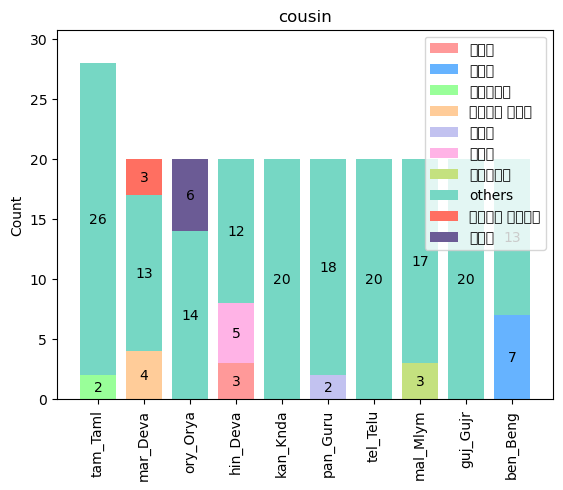

findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: 

KeyboardInterrupt: 

In [ ]:
# Function to create stacked bar graph
def create_stacked_bar_graph(data, title):
    languages = list(data.keys())
    categories = set()
    
    # Collect all categories
    for lang in languages:
        categories.update(data[lang].keys())
    
    categories = list(categories)
    
    # Prepare data for plotting
    values = {category: [] for category in categories}
    
    for lang in languages:
        for category in categories:
            values[category].append(data[lang].get(category, 0))
    
    # Plotting
    fig, ax = plt.subplots()
    
    bottom = [0] * len(languages)
    # Define custom colors
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#76d7c4','#ff6f61','#6b5b95']
    for i, category in enumerate(categories):
        bars = ax.bar(languages, values[category], label=category, bottom=bottom, color=colors[i % len(colors)])
        bottom = [i + j for i, j in zip(bottom, values[category])]
        
        # Adding labels
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{height}',
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            xytext=(0, 0),  # 0 points vertical offset
                            textcoords="offset points",
                            ha='center', va='center')
    
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.legend()
    # set x -ticks and y ticks
    ax.set_xticks(languages)
    ax.set_yticks(range(0, max(bottom) * 2, 5))
    ax.set_xticklabels(languages)
    ax.set_yticklabels(range(0, max(bottom) * 2, 5))
    
    # Adding gap at the top of the y-axis
    ax.set_ylim(0, max(bottom) * 1.1)
    
    plt.xticks(rotation=90)

     
    # Use the Noto Sans font
    # prop = fm.FontProperties(fname=noto_sans)
    # for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #     label.set_fontproperties(prop)

        
    # save figure
    plt.savefig("train"+title+'.png')
    
    plt.show()
    
    # # Use a font that supports the required characters
    # plt.rcParams['font.family'] = 'Noto Sans'
    
    # plt.show()


# Create stacked bar graphs for each level 1 word
for key in trainset_len_dict_res.keys():
    create_stacked_bar_graph(trainset_len_dict_res[key], key)

# Conclusion